<h1>Basic test of the wflow BMI interface

In [1]:
import wflow.wflow_bmi as bmi
import logging

reload(bmi)
%pylab inline 
import datetime
from IPython.html.widgets import interact

1.9.0
1.3
2.0.1
1.5.6
1.8.2
1.6
Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


Startup two models:

+ The wflow_sbm model calculates the runoff from each cell (the LA land-atmosphere model)
+ the wflow_routing model that uses a kinimatic wave for routing the flow (the RT routing model)

In [2]:
# This is the LAnd Atmophere (LA) model
LA_model = bmi.wflowbmi_csdms()
LA_model.initialize('../../examples/wflow_rhine_sbm/wflow_sbm.ini',loglevel=logging.ERROR)

# This is the routing (RT) model
RT_model = bmi.wflowbmi_csdms()
RT_model.initialize('../../examples/wflow_rhine_sbm/wflow_routing.ini',loglevel=logging.ERROR)

<h3>Now we can investigate some model parameters

In [4]:
print(LA_model.get_value("timestepsecs"))
print LA_model.get_start_time()

86400
631152000


In [5]:
LA_model.get_attribute_names()

['API:IF',
 'API:InwaterMM',
 'inputmapstacks:Precipitation',
 'inputmapstacks:EvapoTranspiration',
 'inputmapstacks:Temperature',
 'inputmapstacks:Inflow',
 'fit:parameter_0',
 'fit:Q',
 'fit:ColMeas',
 'fit:ColSim',
 'fit:WarmUpSteps',
 'fit:areamap',
 'fit:areacode',
 'run:timestepsecs',
 'run:reinit',
 'run:starttime',
 'run:runinfo',
 'model:modeltype',
 'model:AnnualDischarge',
 'model:Alpha',
 'model:ModelSnow',
 'model:ScalarInput',
 'model:InterpolationMethod',
 'model:WIMaxScale',
 'model:Tslice',
 'model:UpdMaxDist',
 'model:origTopogLateral',
 'model:reinit',
 'model:fewsrun',
 'model:OverWriteInit',
 'model:updating',
 'model:updateFile',
 'model:lateralmethod',
 'model:DynamicVegetation',
 'model:sCatch',
 'model:intbl',
 'model:timestepsecs',
 'model:MaxUpdMult',
 'model:MinUpdMult',
 'model:UpFrac',
 'model:waterdem',
 'model:reInfilt',
 'model:MassWasting',
 'model:wflow_subcatch',
 'model:wflow_dem',
 'model:wflow_ldd',
 'model:wflow_river',
 'model:wflow_riverlength'

In [6]:
LA_model.get_attribute_value("run:reinit")

'1'

In [7]:
LA_model.set_attribute_value("run:reinit",'1')
LA_model.get_attribute_value("run:reinit")

'1'

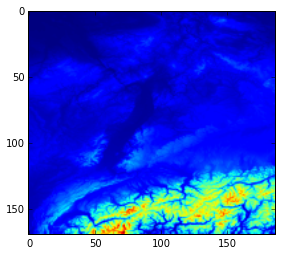

In [9]:
imshow(LA_model.get_value("Altitude"))

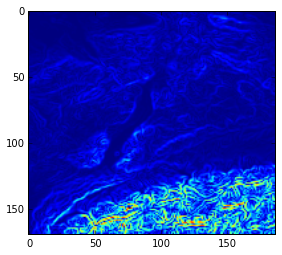

In [10]:
imshow(LA_model.get_value("Slope"))

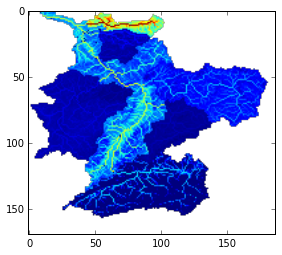

In [11]:
imshow(LA_model.get_value("FirstZoneDepth"))

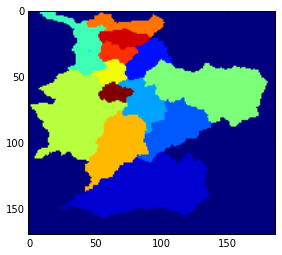

In [12]:
a =LA_model.get_value("TopoId")
a[a==-2147483648] = 0
imshow(a)

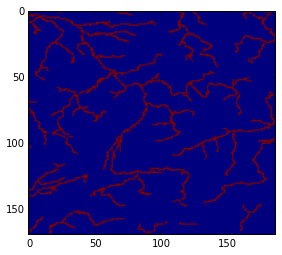

In [13]:
imshow(LA_model.get_value("River"))

<h3>Start and end times

In [14]:
t_end = RT_model.get_end_time()
t_start = RT_model.get_start_time()
t = RT_model.get_current_time()

(t_end  - t_start)/(86400)


28

<h3>Now start the models

In [15]:
t_end = RT_model.get_end_time()
t = RT_model.get_start_time()

res = []
resq = []

# Loop in time and put output of SBM in seperate routing module - 1way link
while t < t_end:
    LA_model.update()
    # Now set the output from the LA model (specific Q) as input to the RT model
    thevar = LA_model.get_value("InwaterMM")
    RT_model.set_value("IW",thevar) # The IW is set in the wflow_routing.ini var as a forcing
    RT_model.update()
    resq.append(RT_model.get_value("SurfaceRunoff"))
    res.append(thevar)
    t = RT_model.get_current_time()
    
    print datetime.datetime.fromtimestamp(t)


1995-02-01 01:00:00
1995-02-02 01:00:00
1995-02-03 01:00:00
1995-02-04 01:00:00
1995-02-05 01:00:00
1995-02-06 01:00:00
1995-02-07 01:00:00
1995-02-08 01:00:00
1995-02-09 01:00:00
1995-02-10 01:00:00
1995-02-11 01:00:00
1995-02-12 01:00:00
1995-02-13 01:00:00
1995-02-14 01:00:00
1995-02-15 01:00:00
1995-02-16 01:00:00
1995-02-17 01:00:00
1995-02-18 01:00:00
1995-02-19 01:00:00
1995-02-20 01:00:00
1995-02-21 01:00:00
1995-02-22 01:00:00
1995-02-23 01:00:00
1995-02-24 01:00:00
1995-02-25 01:00:00
1995-02-26 01:00:00
1995-02-27 01:00:00
1995-02-28 01:00:00


In [ ]:
LA_model.finalize()
RT_model.finalize()

<h4>Define function to view the results

In [ ]:
def browse_res(digits):
    n = len(digits)
    def view_image(i):
        plt.imshow(log(digits[i]+1))
        plt.title('Step: %d' % i)
        plt.colorbar()
        plt.show()
    interact(view_image, i=(0,n-1))

In [ ]:

browse_res(res)


In [ ]:
 browse_res(resq)